# 1. Tugas K-Means

Buatlah sebuah model K-Means dengan ketentuan,

1. Gunakan data 'Mall_Customers.csv'
2. Tentukan fitur apa yang tepat untuk melakukan clustering (minimal 2)
3. Buatlah model K-Means dengan mempertimbangkan jumlah k yang terbaik.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
df = pd.read_csv('../data/Mall_Customers.csv')

In [ ]:
# 2. Pilih fitur untuk clustering (misal: 'Annual Income (k)' dan 'Spending Score (1-100)')
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [7]:
# 3. Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

c:\Users\rafir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\rafir\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rafir\anaconda3\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\rafir\anaconda3\Lib\subprocess.py", line 1039, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
    ~~~~~~~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^

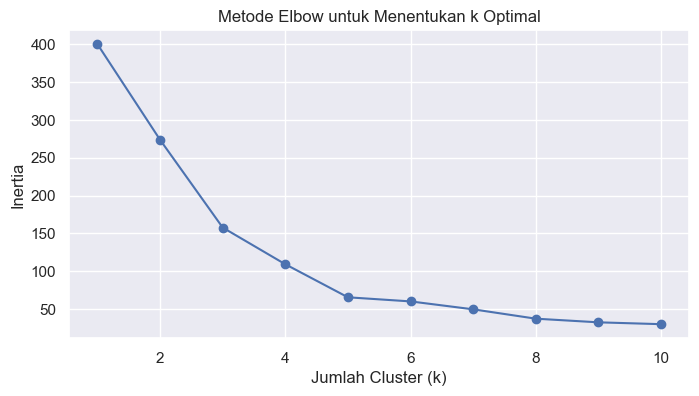

In [8]:
# 4. Tentukan jumlah cluster optimal dengan metode Elbow
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,4))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.title('Metode Elbow untuk Menentukan k Optimal')
plt.show()

In [9]:
# 5. Dari grafik elbow, misal kita pilih k=5
k_optimal = 5
kmeans = KMeans(n_clusters=k_optimal, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

c:\Users\rafir\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


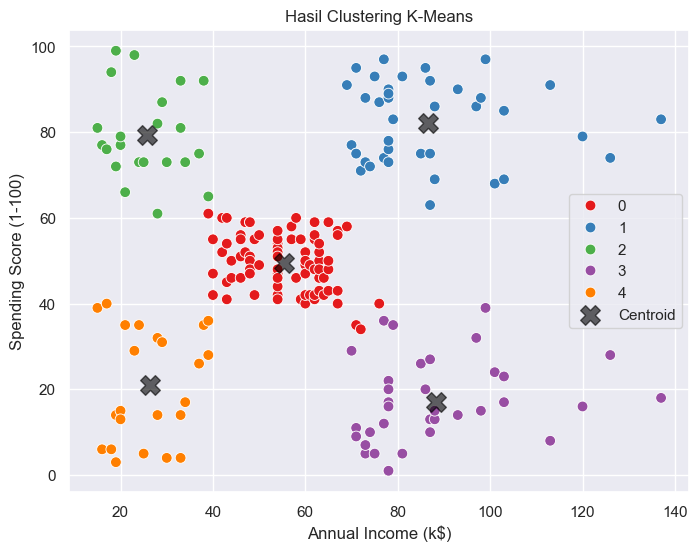

In [10]:
# 6. Visualisasi hasil clustering
plt.figure(figsize=(8,6))
sns.scatterplot(x=X['Annual Income (k$)'], y=X['Spending Score (1-100)'], hue=clusters, palette='Set1', s=60)
plt.scatter(
    scaler.inverse_transform(kmeans.cluster_centers_)[:,0],
    scaler.inverse_transform(kmeans.cluster_centers_)[:,1],
    c='black', s=200, alpha=0.6, marker='X', label='Centroid'
)
plt.title('Hasil Clustering K-Means')
plt.legend()
plt.show()

# 2. Tugas DBSCAN

1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
2. Jalankan DBSCAN dengan eps=0.2, min_samples=5, hitung jumlah klaster & noise.
3. Evaluasi dengan metrik: Homogeneity, Completeness, V-measure, ARI, AMI, Silhouette.
4. Visualisasikan hasil DBSCAN (core sample = titik besar, non-core = titik kecil, noise = hitam).
5. Lakukan eksperimen:
    - eps = 0.05, 0.1, 0.3, 0.5
    - min_samples = 3, 10, 20
    - Catat perubahan klaster, noise, dan kualitas evaluasi.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import (homogeneity_score, completeness_score, v_measure_score,
                             adjusted_rand_score, adjusted_mutual_info_score, silhouette_score)

In [12]:
# 1. Buat dataset make_moons (1000 sampel, noise=0.05), lalu normalisasi.
X, y_true = make_moons(n_samples=1000, noise=0.05, random_state=42)
X = StandardScaler().fit_transform(X)

In [13]:
# 2. Jalankan DBSCAN dengan eps=0.2, min_samples=5
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

In [14]:
# Hitung jumlah klaster & noise
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print(f"Jumlah klaster: {n_clusters}")
print(f"Jumlah noise: {n_noise}")

Jumlah klaster: 2
Jumlah noise: 0


In [15]:
# 3. Evaluasi dengan metrik
print("Homogeneity:", homogeneity_score(y_true, labels))
print("Completeness:", completeness_score(y_true, labels))
print("V-measure:", v_measure_score(y_true, labels))
print("Adjusted Rand Index:", adjusted_rand_score(y_true, labels))
print("Adjusted Mutual Info:", adjusted_mutual_info_score(y_true, labels))
print("Silhouette Coefficient:", silhouette_score(X, labels))

Homogeneity: 1.0
Completeness: 1.0
V-measure: 1.0
Adjusted Rand Index: 1.0
Adjusted Mutual Info: 1.0
Silhouette Coefficient: 0.3911598537138403


In [16]:
# 4. Visualisasikan hasil DBSCAN
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[dbscan.core_sample_indices_] = True
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

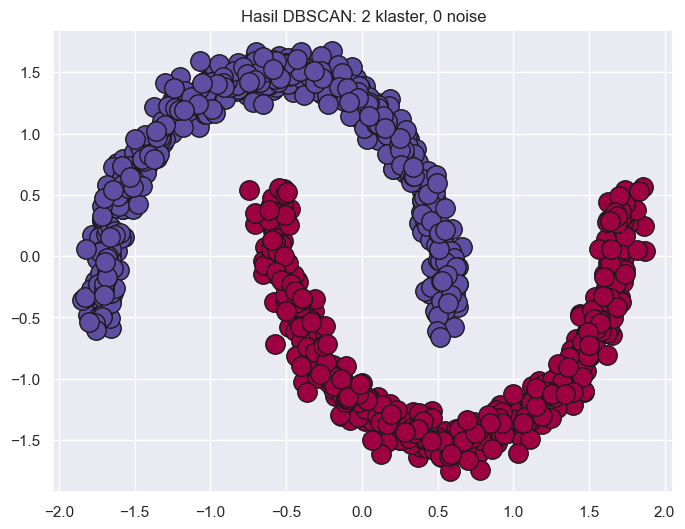

In [17]:
plt.figure(figsize=(8,6))
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black for noise
        col = [0, 0, 0, 1]
    class_member_mask = (labels == k)
    # Core samples
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)
    # Border samples
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)
plt.title(f'Hasil DBSCAN: {n_clusters} klaster, {n_noise} noise')
plt.show()